## install bioconductor and consensus cluster

In [1]:
source("https://bioconductor.org/biocLite.R")

Bioconductor version 3.6 (BiocInstaller 1.28.0), ?biocLite for help
A new version of Bioconductor is available after installing the most recent
  version of R; see http://bioconductor.org/install


In [2]:
biocLite("ConsensusClusterPlus")

BioC_mirror: https://bioconductor.org
Using Bioconductor 3.6 (BiocInstaller 1.28.0), R 3.4.1 (2017-06-30).
Installing package(s) 'ConsensusClusterPlus'


package 'ConsensusClusterPlus' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\test\AppData\Local\Temp\RtmpIRl9hJ\downloaded_packages


Old packages: 'boot', 'cluster', 'crayon', 'digest', 'evaluate', 'foreign',
  'IRdisplay', 'MASS', 'Matrix', 'mgcv', 'nlme', 'pbdZMQ', 'R6', 'repr',
  'rpart', 'stringi', 'stringr', 'survival'


In [2]:
library(ALL)

Loading required package: Biobase
Warning message:
"package 'Biobase' was built under R version 3.4.2"Loading required package: BiocGenerics
Warning message:
"package 'BiocGenerics' was built under R version 3.4.2"Loading required package: parallel

Attaching package: 'BiocGenerics'

The following objects are masked from 'package:parallel':

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs

The following objects are masked from 'package:base':

    anyDuplicated, append, as.data.frame, cbind, colMeans, colnames,
    colSums, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, lengths, Map, mapply, match,
    mget, order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rowMeans, rownames, rowSums, sapply

## Data Processing

In [4]:
data(ALL)

In [5]:
d=exprs(ALL)

In [6]:
d[1:5,1:5]

,01005,01010,03002,04006,04007
1000_at,7.597323,7.479445,7.567593,7.384684,7.905312
1001_at,5.046194,4.932537,4.799294,4.922627,4.844565
1002_f_at,3.900466,4.208155,3.886169,4.206798,3.416923
1003_s_at,5.903856,6.169024,5.860459,6.116890,5.687997
1004_at,5.925260,5.912780,5.893209,6.170245,5.615210


In [8]:
mads=apply(d,1,mad)
d=d[rev(order(mads))[1:5000],]
d = sweep(d,1, apply(d,1,median,na.rm=T))


In [10]:
d = sweep(d,1, apply(d,1,median,na.rm=T))

In [11]:
d[1:5,1:5]

,01005,01010,03002,04006,04007
36638_at,1.5561207,0.9521271,-0.05018082,4.780378,3.93006775
39318_at,1.1913532,2.5013225,-2.38793537,-1.199521,1.93626914
38514_at,1.0207162,3.2785671,1.55949145,-3.345919,-0.01548269
266_s_at,1.8292604,0.3624327,1.54913247,-1.286294,1.75669694
38585_at,-0.9240204,0.1895020,3.44968363,-2.216822,5.18702726


## Run Consensus Cluster Plus

For this tutorial, we selected 80% item resampling (pItem), 80% gene resampling
(pFeature), a maximum evalulated k of 6 so that cluster counts of 2,3,4,5,6 are
evaluated (maxK), 50 resamplings (reps), agglomerative heirarchical clustering
2 algorithm (clusterAlg) upon 1- Pearson correlation distances (distance), gave
our output a title (title), and opted to have graphical results written to png
files. We also used a specific random seed so that this example is repeatable
(seed).

Note that clusters are performed on dataframe columns

Results are returned in a list, where every element in that list is a cluster 
assignment matrix of that index's k clusters


end fraction
clustered
clustered


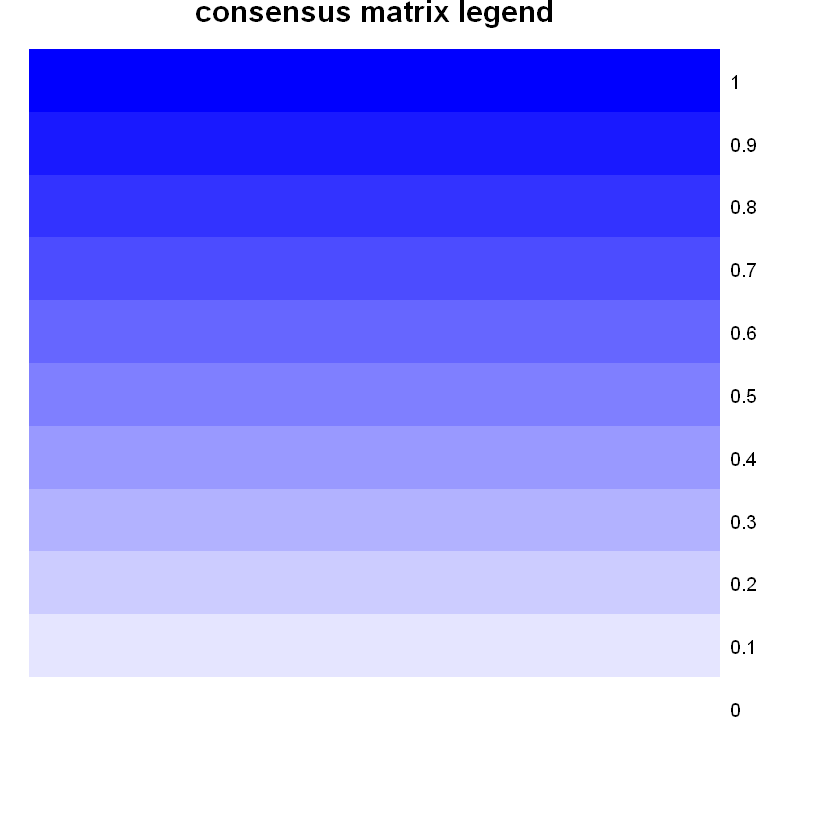

clustered


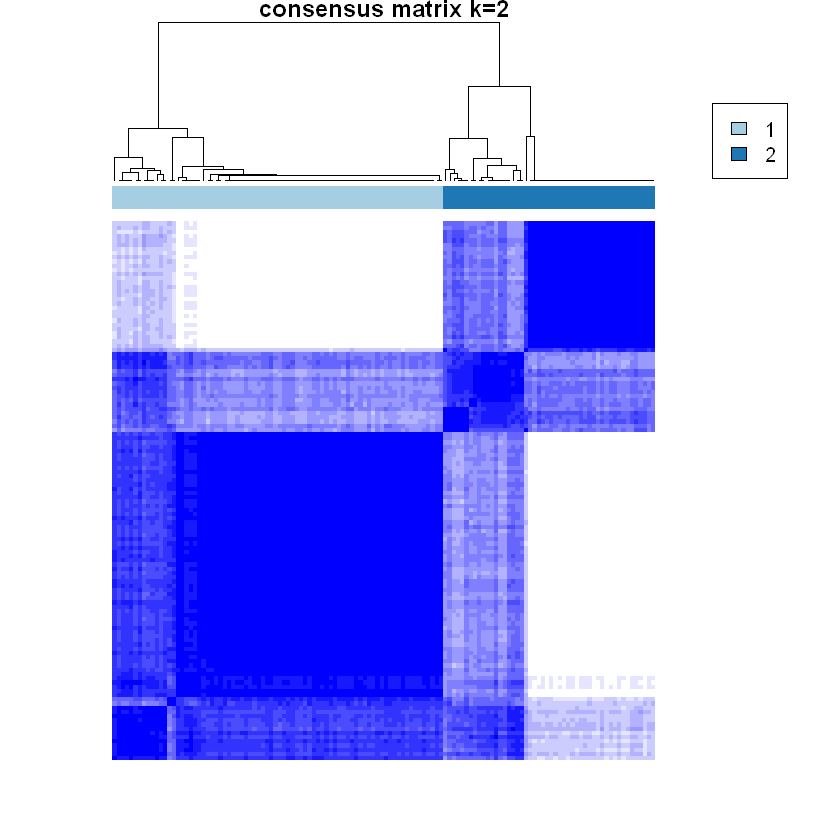

clustered


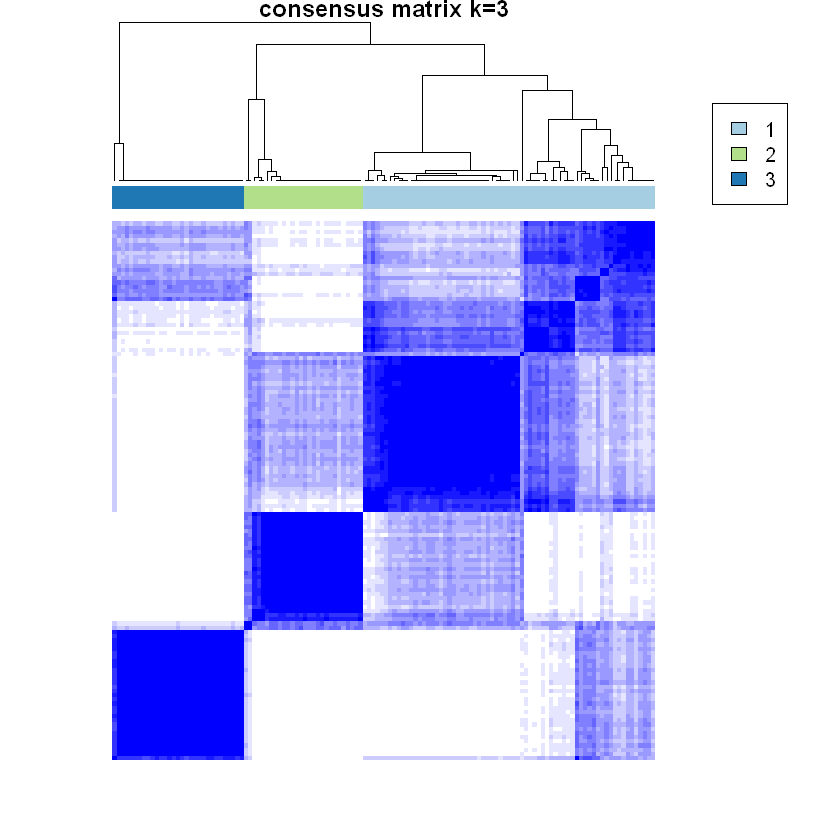

clustered


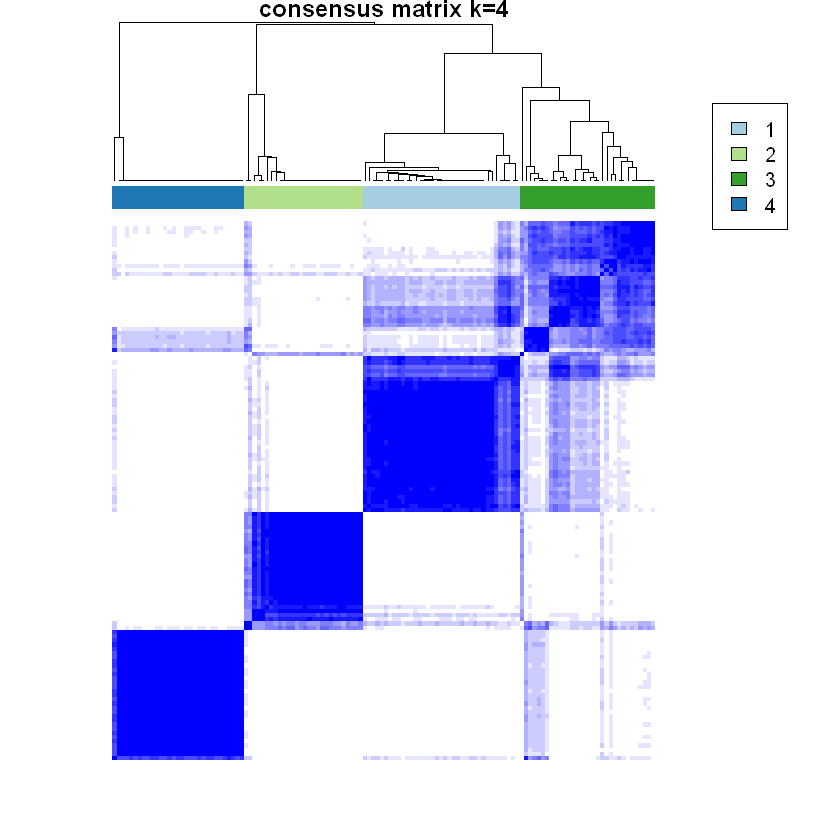

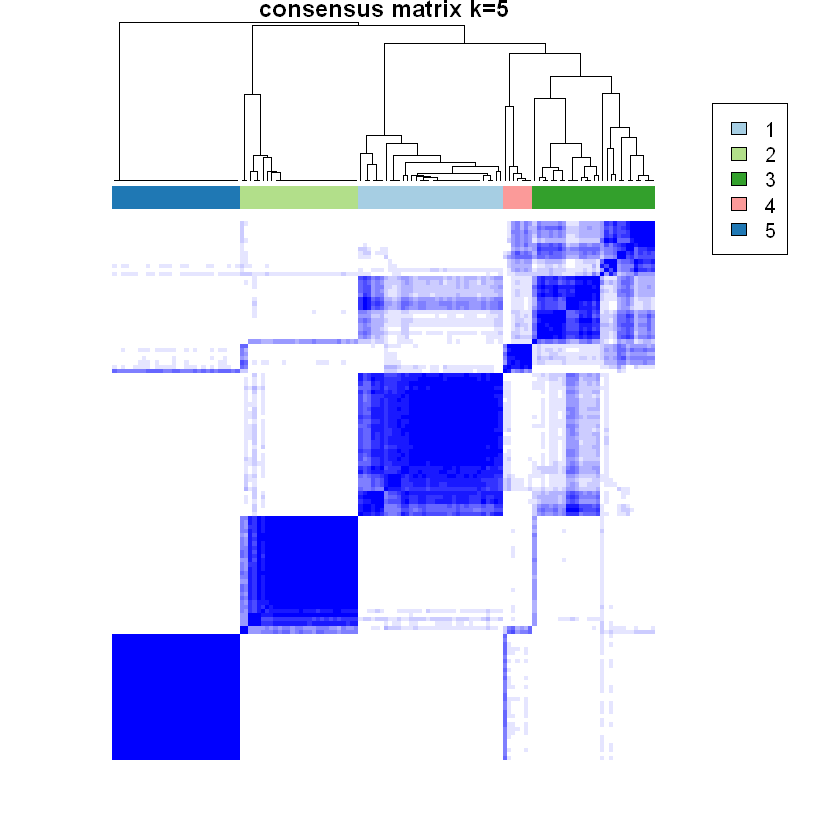

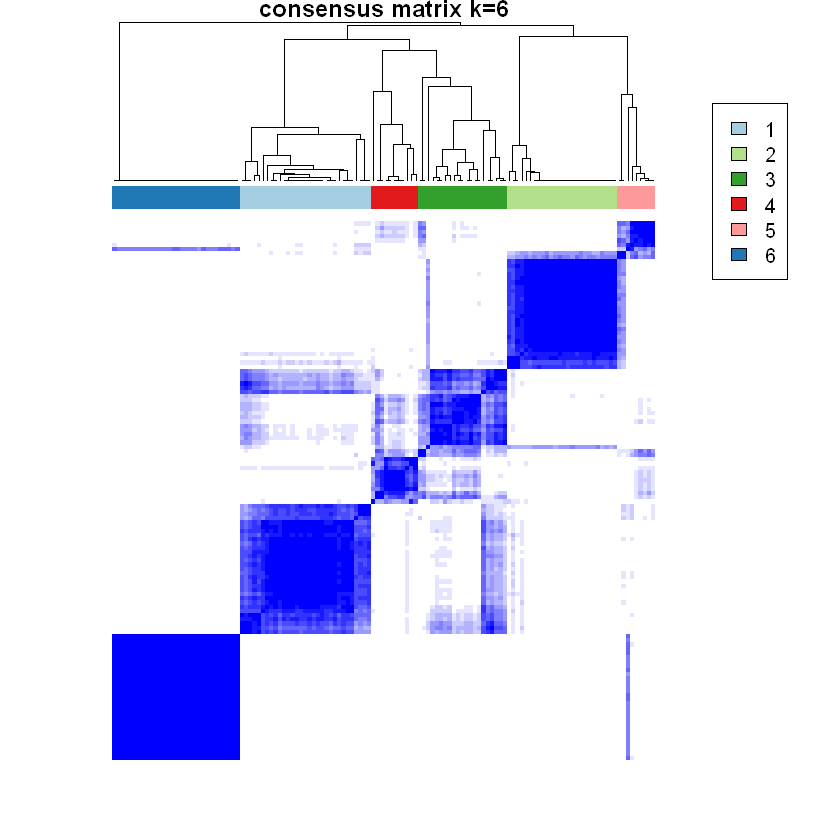

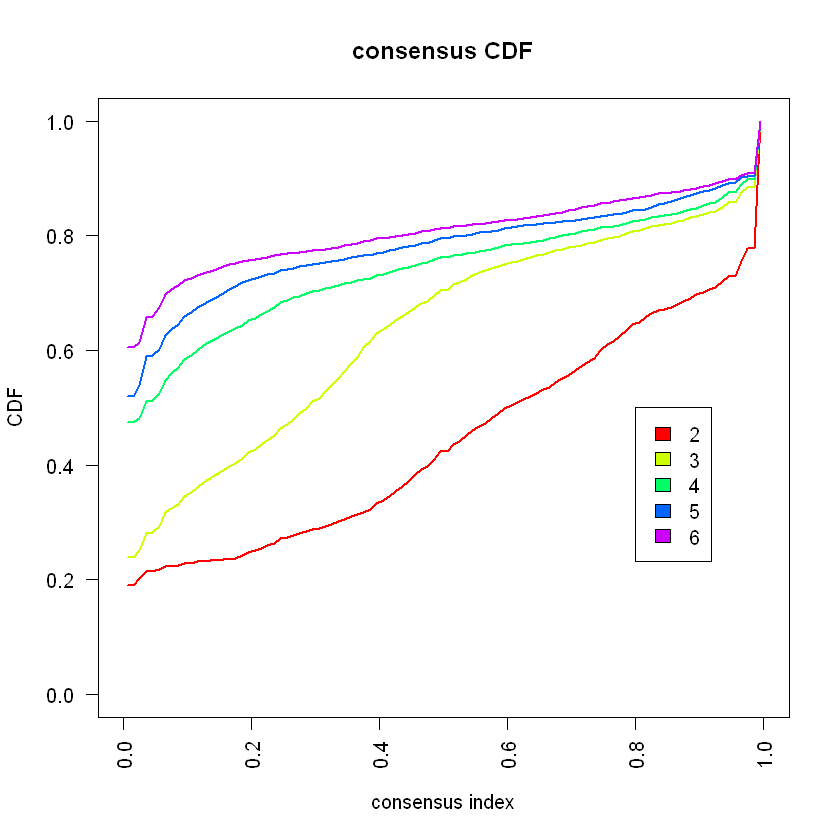

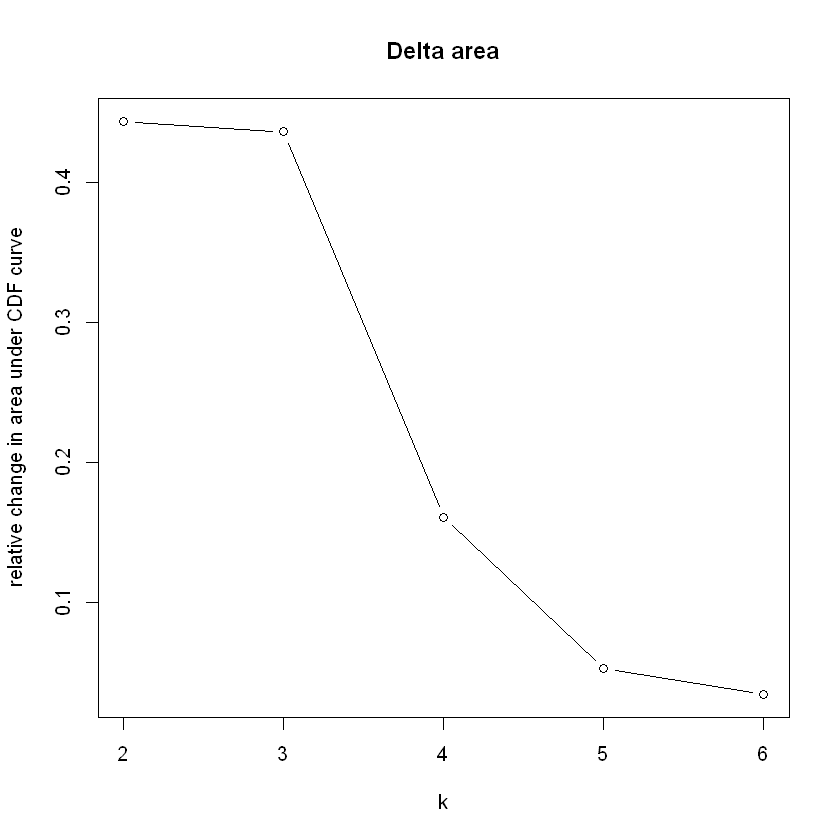

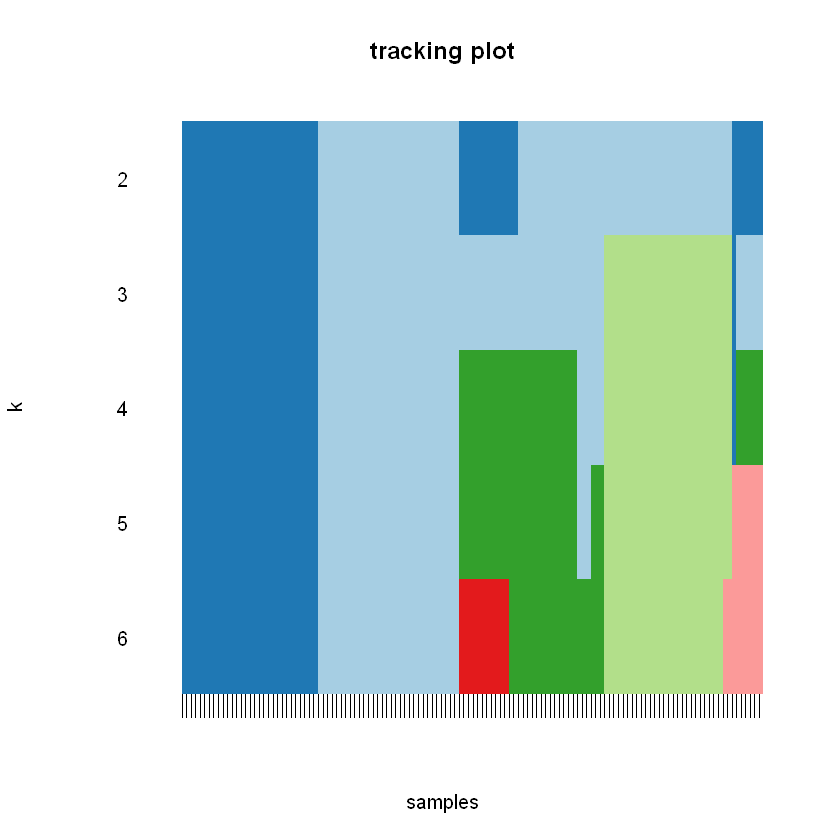

In [14]:
library(ConsensusClusterPlus)
title=tempdir()
results = ConsensusClusterPlus(d, maxK=6 ,reps=50, pItem=0.8, pFeature=1, 
                               title=title, clusterAlg="hc", distance="pearson",
                               seed=1262118388.71279)


In [13]:
results[[2]][["consensusTree"]]


Call:
hclust(d = as.dist(1 - fm), method = finalLinkage)

Cluster method   : average 
Number of objects: 128 


## Load TCGA data

In [13]:
# # read from table
# cpiv = read.table("brca_1M_clove_pivot.tab", header=T, sep="\t", row.names = "exp")

# # load from rda object

load('brca_1M_clove_pivot_df.Rda')  # refer to it as cpiv once loaded (name given at save)

In [ ]:
typeof(cpiv)

In [12]:
# rownames are expressed genes
# column names are copy loss genes
cpiv

[1] "cpiv"

In [14]:
memory.limit()
memory.limit(size=56000)

[1] 8117

[1] 56000

In [31]:
cpiv_sampl = cpiv[sample(nrow(cpiv), 8000), ]
cpiv_sampl = t(cpiv_sampl)
cpiv_sampl = cpiv[sample(nrow(cpiv), 8000), ]
cpiv_sampl = t(cpiv_sampl)

In [32]:
head(cpiv_sampl)

,MAP1D,ABHD5,CASP5,CD28,BRCA1,USP2,KLF17,CCNB2,MED24,C11orf58,...,CAPN5,IL8,MED27,TDRD12,CAMK1,VN1R4,ZC3H12B,PRLHR,ZNF431,EFR3A
A1BG,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
A1BG.AS1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
A1CF,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
A2M,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
A2M.AS1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
A2ML1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [35]:
zeroVar <- function(data, useNA = 'ifany') {
    out <- apply(data, 2, function(x) {length(table(x, useNA = useNA))})
    which(out==1)
}

In [1]:
cpiv_sampl[,-zeroVar(cpiv_sampl)]

ERROR: Error in eval(expr, envir, enclos): object 'cpiv_sampl' not found


In [6]:
library(ConsensusClusterPlus)
title=tempdir()
results = ConsensusClusterPlus(cpiv_sampl, maxK=6 ,reps=8, pItem=0.8, pFeature=1, 
                               title=title, clusterAlg="hc", distance="pearson",
                               seed=1262118388.71279)


Warning message:
"package 'ConsensusClusterPlus' was built under R version 3.4.2"

ERROR: Error in class(d) %in% c("dist", "matrix", "ExpressionSet"): object 'cpiv_sampl' not found


For this tutorial, we selected 80% item resampling (pItem), 80% gene resampling
(pFeature), a maximum evalulated k of 6 so that cluster counts of 2,3,4,5,6 are
evaluated (maxK), 50 resamplings (reps), agglomerative heirarchical clustering
2 algorithm (clusterAlg) upon 1- Pearson correlation distances (distance), gave
our output a title (title), and opted to have graphical results written to png
files. We also used a specific random seed so that this example is repeatable
(seed).

In practice, a much higher reps is recommended such as 1,000 and a
higher cluster count such as 20.

Note that clusters are performed on dataframe columns

Results are returned in a list, where every element in that list is a cluster 
assignment matrix of that index's k clusters


In [30]:
save(cpiv,file="brca_1M_clove_pivot_df.Rda")

In [5]:
cpiv <- as.matrix(cpiv)

In [7]:
library(ConsensusClusterPlus)
title=tempdir()
results = ConsensusClusterPlus(cpiv, maxK=6 ,reps=8, pItem=0.8, pFeature=1, 
                               title=title, clusterAlg="hc", distance="pearson",
                               seed=1262118388.71279)


ERROR: Error in cor(d, method = distance, use = corUse): 'x' must be numeric


In [9]:
cpiv

cpiv
